## Import

In [231]:
from zipfile import ZipFile
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA  # to apply PCA
from sklearn.compose import make_column_transformer

import matplotlib.pyplot as plt 

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
df = pd.read_csv("data.csv")
df

,-0.18742052102399506,0.13123041807890418,0.14389320278704634,-0.18547592277960087,-0.12672893308287914
0,1.619760,1.165669,1.123722,1.618634,-2.007404
1,0.508120,0.605804,0.601210,0.513154,0.734771
2,-0.801372,-0.510272,-0.463632,-0.803233,0.091330
3,-0.558647,-0.211937,-0.181563,-0.559327,-1.008862
4,1.011927,0.890585,0.870272,1.012558,-2.227518
...,...,...,...,...,...
1994,0.979292,0.865800,0.841783,0.983651,1.194655
1995,1.434147,1.076005,1.048022,1.431939,-1.067240
1996,-0.077276,0.217731,0.223425,-0.082174,0.704316
1997,1.181223,0.967514,0.932469,1.180012,1.456029


## Level 1

In [6]:
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data

,0,1,2,3,4
0,1.619275,1.165448,1.123519,1.618150,-2.006974
1,0.507903,0.605720,0.601134,0.512937,0.734526
2,-0.801273,-0.510081,-0.463446,-0.803132,0.091244
3,-0.558606,-0.211819,-0.181447,-0.559285,-1.008677
4,1.011589,0.890431,0.870131,1.012221,-2.227034
...,...,...,...,...,...
1994,0.978962,0.865653,0.841648,0.983321,1.194298
1995,1.433707,1.075806,1.047837,1.431500,-1.067041
1996,-0.077351,0.217743,0.223442,-0.082247,0.704079
1997,1.180844,0.967342,0.932313,1.179634,1.455608


In [13]:
pca = PCA(n_components = 2)
pca.fit(df)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

c:\Users\s8gre\anaconda3\envs\ai\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,PC1,PC2
0,-2.676633,-2.133107
1,-1.143645,0.689403
2,1.284087,0.153538
3,0.797242,-0.966012
4,-1.797160,-2.307109


In [16]:
round(data_pca.std(), 2)

PC1    1.97
PC2    1.00
dtype: float64

## Level 2

(3.0, -3.0)

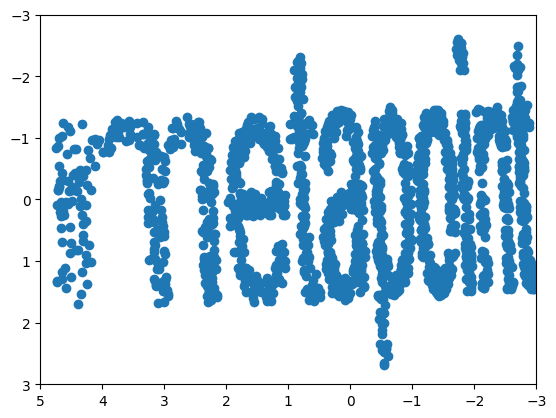

In [28]:
fig, ax = plt.subplots()

ax.scatter(data_pca["PC1"], data_pca["PC2"])
ax.set_xlim(5, -3)
ax.set_ylim(3, -3)

## Level 3

In [30]:
with ZipFile('./encrypted.zip') as zf:
    zf.extractall(pwd=b'metapoint')

<zipfile.ZipFile [closed]>

In [32]:
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")
train_df.head()

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,C,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,C,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,C,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,C,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,C,-0.751,0.492,1.821


In [66]:
train_df.shape

(984, 9)

In [38]:
labels = np.array(train_df.columns.array)
labels

array(['MODE', 'POWER', 'AMPS', 'VOLTS', 'TEMP', 'UNIT', 'DELTA', 'GAMMA',
       'OUTPUT'], dtype=object)

In [48]:
train_df[labels].isnull().sum()

MODE      0
POWER     0
AMPS      0
VOLTS     0
TEMP      0
UNIT      0
DELTA     0
GAMMA     0
OUTPUT    0
dtype: int64

In [47]:
train_df = train_df.dropna()
train_df.shape

(984, 9)

In [70]:
train_df.head()

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,C,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,C,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,C,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,C,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,C,-0.751,0.492,1.821


In [82]:
train_df.drop(train_df[(train_df["AMPS"] < 0.0) | (train_df["AMPS"] > 1.0)].index, inplace=True)

C:\Users\s8gre\AppData\Local\Temp\ipykernel_23548\1608942874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(train_df[(train_df["AMPS"] < 0.0) | (train_df["AMPS"] > 1.0)].index, inplace=True)


In [78]:
train_df[(train_df["VOLTS"] < 0.02) | (train_df["VOLTS"] > 8.7)]

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT


In [77]:
train_df[(train_df["TEMP"] < -100) | (train_df["TEMP"] > 373.15)]

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT


In [76]:
train_df[(train_df["DELTA"] < -1) | (train_df["DELTA"] > 1)]

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT


In [75]:
train_df[(train_df["GAMMA"] < -2) | (train_df["GAMMA"] > 2)]

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT


In [74]:
train_df[(train_df["OUTPUT"] < -8.4) | (train_df["OUTPUT"] > 9.3)]

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT


In [83]:
train_df.shape

(971, 9)

## Level 4

In [84]:
train_df.head()

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,C,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,C,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,C,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,C,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,C,-0.751,0.492,1.821


In [91]:
train_df.loc[train_df["UNIT"] == "K","TEMP"] += -273.15
train_df[train_df["UNIT"] == "K"]["TEMP"]

11    -16.690
12     11.143
15     99.437
17     77.756
18    -18.798
        ...  
983   -35.493
986    68.303
987    81.332
991    20.805
995     1.431
Name: TEMP, Length: 221, dtype: float64

In [95]:
print(round(train_df[train_df["UNIT"] == "K"]["TEMP"].mean(), 2))
print(round(train_df[train_df["UNIT"] == "K"]["TEMP"].std()))

-0.69
48


In [105]:
print("Celcius min and max: ", train_df[train_df["UNIT"] == "C"]["TEMP"].min(), train_df[train_df["UNIT"] == "C"]["TEMP"].max())


Celcius min and max:  -100.0 100.0


In [117]:
train_df["UNIT"].unique()

array(['C', '?', 'K'], dtype=object)

In [144]:
cond = (train_df[train_df["UNIT"] == "?"]["TEMP"] > 100.0) | (train_df[train_df["UNIT"] == "?"]["TEMP"] < -100.0)
# this are kelvin values
train_df.loc[train_df["UNIT"] == "?", "TEMP"] = np.where(cond, train_df.loc[train_df["UNIT"] == "?", "TEMP"] -273.15, train_df.loc[train_df["UNIT"] == "?", "TEMP"])
train_df[train_df["UNIT"] == "?"]["TEMP"][cond]

34      62.528
46     -10.217
53     -38.861
72     -51.780
77     -71.347
86      -6.353
96      23.665
100     37.693
142    -25.480
145    -50.623
157    -58.455
162     49.412
178    -48.255
210    -50.328
213     40.673
220     21.213
224     86.729
235     -0.557
272    -43.061
289     54.929
300    -31.449
332     25.001
340     67.204
367    -31.054
368    -43.168
405    -38.442
449    -22.396
451    -28.763
464     53.504
489    -15.000
532     28.631
553    -92.457
576     -9.936
609     33.978
612    -42.454
631    -11.727
658     81.475
683      7.083
687    -21.189
720    -46.629
728    -29.834
733     55.175
763    -54.914
777    -11.079
808    -44.409
842     70.993
852     89.846
893   -100.000
954     28.353
958    -25.695
997    -71.590
Name: TEMP, dtype: float64

In [146]:
# removing not needed unit table => now everything is celcius 
del train_df["UNIT"]

In [147]:
train_df.shape

(971, 8)

In [148]:
train_df.head()

,MODE,POWER,AMPS,VOLTS,TEMP,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,-0.751,0.492,1.821


## Level 5, 6, 8, 9

In [158]:
train_df.head()

,MODE,POWER,AMPS,VOLTS,TEMP,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,-0.751,0.492,1.821


In [151]:
test_df.head()

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA
0,REDACTED,high,0.126,7.489,14.284,C,-0.818,0.692
1,REDACTED,high,0.917,4.557,17.746,C,0.251,-0.709
2,REDACTED,high,0.508,2.928,-9.866,C,-0.273,1.056
3,auto,low,0.832,2.464,-32.047,C,0.145,-0.572
4,auto,low,0.501,2.711,1.349,C,0.431,-0.939


In [153]:
test_df["UNIT"].unique()

array(['C'], dtype=object)

In [154]:
del test_df["UNIT"]

In [255]:
# one hot encoding mode and power
categorical_labels = ["MODE", "POWER"]

encoded_train_df = pd.get_dummies(train_df, columns=categorical_labels, drop_first=True, dtype=int)
encoded_test_df = pd.get_dummies(test_df, columns=categorical_labels, drop_first=True, dtype=int)
labels_train = np.array(encoded_train_df.columns)
labels_test = np.array(encoded_test_df.columns)
encoded_test_df

,AMPS,VOLTS,TEMP,DELTA,GAMMA,MODE_auto,MODE_beam,MODE_burst,POWER_low
0,0.126,7.489,14.284,-0.818,0.692,0,0,0,0
1,0.917,4.557,17.746,0.251,-0.709,0,0,0,0
2,0.508,2.928,-9.866,-0.273,1.056,0,0,0,0
3,0.832,2.464,-32.047,0.145,-0.572,1,0,0,1
4,0.501,2.711,1.349,0.431,-0.939,1,0,0,1
...,...,...,...,...,...,...,...,...,...
2495,0.639,2.318,-21.235,-0.786,0.399,0,0,0,0
2496,0.630,1.569,-12.947,0.768,-0.001,0,0,0,0
2497,0.813,1.854,-29.502,-0.408,0.638,1,0,0,1
2498,0.172,3.663,-0.141,0.595,0.995,1,0,0,1


In [256]:
# normalize the data
scaler = MinMaxScaler()
for column in encoded_train_df.columns:
    if column == "OUTPUT": 
        continue
    encoded_train_df[column] = scaler.fit_transform(encoded_train_df[column].values.reshape(-1, 1))
encoded_train_df

,AMPS,VOLTS,TEMP,DELTA,GAMMA,OUTPUT,MODE_auto,MODE_beam,MODE_burst,POWER_low
0,0.585586,0.498502,0.834060,0.171271,0.36825,3.749,0.0,0.0,0.0,0.0
1,0.687688,0.275576,0.414780,0.757408,0.40725,-1.062,0.0,1.0,0.0,1.0
2,0.888889,0.340899,0.704590,0.803616,0.85300,2.265,0.0,0.0,0.0,1.0
3,0.114114,0.084562,0.283460,0.120542,0.47275,1.847,1.0,0.0,0.0,1.0
4,0.318318,0.453341,0.688760,0.125063,0.62300,1.821,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,0.350350,0.488134,0.507155,1.000000,0.41625,2.466,1.0,0.0,0.0,1.0
996,0.644645,0.127650,0.361465,0.236565,0.50850,-1.834,0.0,1.0,0.0,1.0
997,0.887888,0.161060,0.142050,0.868408,0.37425,-0.188,0.0,0.0,1.0,1.0
998,0.323323,0.031221,0.414190,0.441989,0.63100,0.081,0.0,0.0,0.0,1.0


In [257]:
for column in encoded_test_df.columns:
    encoded_test_df[column] = scaler.fit_transform(encoded_test_df[column].values.reshape(-1, 1))
encoded_test_df

,AMPS,VOLTS,TEMP,DELTA,GAMMA,MODE_auto,MODE_beam,MODE_burst,POWER_low
0,0.126126,0.860484,0.571420,0.090545,0.67300,0.0,0.0,0.0,0.0
1,0.917918,0.522696,0.588730,0.625313,0.32275,0.0,0.0,0.0,0.0
2,0.508509,0.335023,0.450670,0.363182,0.76400,0.0,0.0,0.0,0.0
3,0.832833,0.281567,0.339765,0.572286,0.35700,1.0,0.0,0.0,1.0
4,0.501502,0.310023,0.506745,0.715358,0.26525,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2495,0.639640,0.264747,0.393825,0.106553,0.59975,0.0,0.0,0.0,0.0
2496,0.630631,0.178456,0.435265,0.883942,0.49975,0.0,0.0,0.0,0.0
2497,0.813814,0.211290,0.352490,0.295648,0.65950,1.0,0.0,0.0,1.0
2498,0.172172,0.419700,0.499295,0.797399,0.74875,1.0,0.0,0.0,1.0


In [258]:
X_train = np.array(encoded_train_df[labels_test])
y_train = np.array(encoded_train_df["OUTPUT"])
X_train.shape

(971, 9)

In [259]:
X_test = np.array(encoded_test_df[labels_test])
X_test.shape

(2500, 9)

In [237]:
class Network(nn.Module): 
    def __init__(self, input_shape, output_shape, dropout, device): 
        super().__init__()
        self.linear_input = nn.Linear(input_shape, 16)
        self.linear_output = nn.Linear(16, output_shape)

        self.to(device)

    def forward(self, x): 
        x = F.relu(self.linear_input(x))
        x = self.linear_output(x)
        return x

In [238]:
# solution with neural network not good!
learning_rate = 0.0001
dropout_rate = 0.2
input_shape = X_train.shape[1]
output_shape = 1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 100

model = Network(input_shape, output_shape, dropout_rate, device)

input_tensor = torch.tensor(X_train, dtype=torch.float32)
labels_tensor = torch.tensor(y_train, dtype=torch.float32)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


for epoch in tqdm(range(epochs)):
    input_tensor, labels_tensor = input_tensor.to(device), labels_tensor.to(device) 
    outputs = model(input_tensor)
    loss = loss_fn(outputs, labels_tensor)

    loss.backward()
    optimizer.step()
    tqdm.write(f"Loss: {loss.item()}")

# torch.save(model.state_dict(), "model.pt")

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\s8gre\anaconda3\envs\ai\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([971])) that is different to the input size (torch.Size([971, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
                                                 

Loss: 6.317727088928223
Loss: 6.317558765411377
Loss: 6.3173980712890625
Loss: 6.317239761352539
Loss: 6.317082405090332
Loss: 6.316926002502441
Loss: 6.316769123077393
Loss: 6.316612243652344
Loss: 6.316454887390137
Loss: 6.31629753112793
Loss: 6.3161396980285645
Loss: 6.315981864929199
Loss: 6.315824031829834
Loss: 6.3156657218933105
Loss: 6.315507888793945
Loss: 6.315349578857422
Loss: 6.315191745758057
Loss: 6.31503438949585
Loss: 6.314877033233643
Loss: 6.314719200134277
Loss: 6.3145623207092285
Loss: 6.314405918121338
Loss: 6.314249515533447
Loss: 6.314094066619873
Loss: 6.313939094543457


Loss: 6.313785552978516
Loss: 6.313631534576416
Loss: 6.313478946685791
Loss: 6.313327312469482
Loss: 6.31317663192749
Loss: 6.313028335571289
Loss: 6.31287956237793
Loss: 6.312732696533203
Loss: 6.312586784362793
Loss: 6.312442779541016
Loss: 6.312299728393555
Loss: 6.312158107757568
Loss: 6.312017917633057
Loss: 6.311879634857178
Loss: 6.311742782592773
Loss: 6.3116068840026855
Loss: 6.311473369598389
Loss: 6.311341762542725
Loss: 6.311211109161377
Loss: 6.311082363128662
Loss: 6.31095552444458
Loss: 6.310830593109131
Loss: 6.3107075691223145
Loss: 6.310586452484131
Loss: 6.31046724319458


 72%|███████▏  | 72/100 [00:00<00:00, 128.57it/s]

Loss: 6.310349941253662
Loss: 6.310235023498535
Loss: 6.310122013092041
Loss: 6.31001091003418
Loss: 6.309902667999268
Loss: 6.309795379638672
Loss: 6.309691429138184
Loss: 6.30958890914917
Loss: 6.3094892501831055
Loss: 6.309391498565674
Loss: 6.309295654296875
Loss: 6.309202671051025
Loss: 6.30911111831665
Loss: 6.309022903442383
Loss: 6.30893611907959
Loss: 6.30885124206543
Loss: 6.308769702911377
Loss: 6.308689594268799
Loss: 6.308611869812012
Loss: 6.308536529541016
Loss: 6.308463096618652
Loss: 6.30839204788208
Loss: 6.308323383331299
Loss: 6.308255672454834


 87%|████████▋ | 87/100 [00:00<00:00, 134.98it/s]

Loss: 6.308190822601318
Loss: 6.3081278800964355
Loss: 6.308067798614502
Loss: 6.308009147644043
Loss: 6.307952880859375
Loss: 6.307898998260498
Loss: 6.307846546173096
Loss: 6.307796001434326
Loss: 6.307747840881348
Loss: 6.307701587677002
Loss: 6.307657241821289
Loss: 6.307614326477051
Loss: 6.307573318481445
Loss: 6.307534694671631
Loss: 6.307497024536133
Loss: 6.307460784912109
Loss: 6.307426929473877
Loss: 6.307394981384277
Loss: 6.307364463806152
Loss: 6.30733585357666
Loss: 6.307308197021484
Loss: 6.3072829246521
Loss: 6.307258605957031
Loss: 6.307235240936279
Loss: 6.307212829589844


100%|██████████| 100/100 [00:00<00:00, 131.96it/s]

Loss: 6.307192802429199


In [327]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = ExtraTreesRegressor(n_estimators=140, random_state=42)
model.fit(X_train_r, y_train_r)

y_pred_r = model.predict(X_test_r)

mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 0.1946
R-squared: 0.9628


In [328]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([2.42287143, 2.50257143, 2.27662857, ..., 2.17108571, 2.16427857,
       2.67458571])

In [329]:
output_file_path = "predictions.txt"
with open(output_file_path, "w") as file:
    for prediction in y_pred:
        file.write(f"{prediction}\n")

## Level 7

In [265]:
y_pred.mean()

0.208669385651733

In [288]:
predictions_matrix = np.array(y_pred).reshape(50, 50)
predictions_matrix

2.3551702517665896

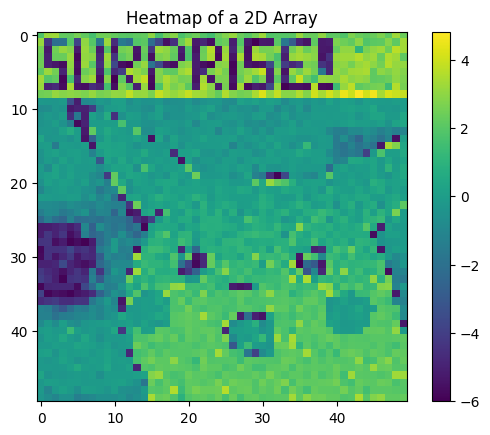

In [289]:
plt.imshow(predictions_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add colorbar to show the scale
plt.title('Heatmap of a 2D Array')
plt.show()

## Level 8